https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/temps.csv')
df.head()


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [28]:
df = pd.get_dummies(df)

In [29]:
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### 3. Divide en train y test

In [30]:
X = df[["temp_2", "temp_1", "average", "friend"]]
y = df[["actual"]]

In [31]:
y1 = np.array(df[["actual"]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor(random_state=0)

In [34]:
pred = model.fit(X, y)

In [35]:
predi = model.predict(X)

### 5. Calcula su MAE
Sin usar sklearn

In [36]:
d = y1 - predi
mae_f = np.mean(abs(d))
print("MAE :", mae_f)

MAE : 13.449976879376404


### 6. Calcula su MAPE
Sin usar sklearn

In [37]:
mape = np.mean(np.abs((y1 - predi)/y1))*100
print("MAPE :", mape)

MAPE : 22.63173359471399


### 7. Representa el árbol de decision

In [41]:
df1 = df[["temp_2", "temp_1", "average", "friend", "actual"]]

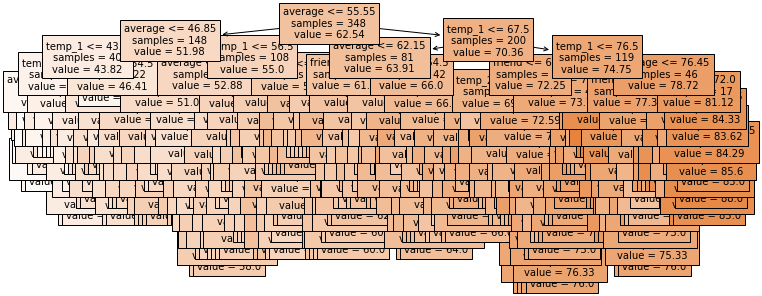

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))
plot = plot_tree(
            decision_tree = model,
            feature_names = df1.drop(columns = "actual").columns,
            class_names   = "actual",
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [46]:
model = DecisionTreeRegressor(max_depth = 3, random_state=0)
pred = model.fit(X, y)
predi = model.predict(X)

### 9. Vuelve a calcular si MAE

In [47]:
d = y1 - predi
mae_f = np.mean(abs(d))
print("MAE :", mae_f)

MAE : 12.972602061038442


### 10. Vuelve a representar su árbol

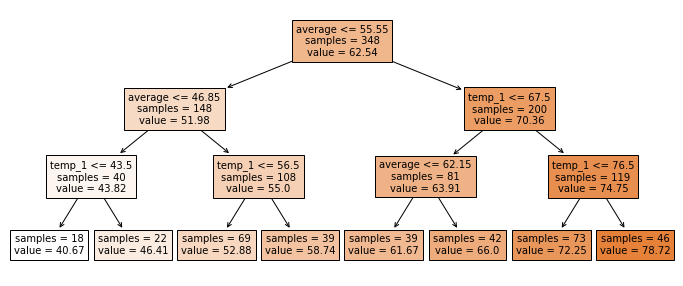

In [48]:
fig, ax = plt.subplots(figsize=(12, 5))
plot = plot_tree(
            decision_tree = model,
            feature_names = df1.drop(columns = "actual").columns,
            class_names   = "actual",
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### 10. Obten el `feature_importances` de cada variable en el último modelo

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.19668
Feature: 2, Score: 0.80332
Feature: 3, Score: 0.00000


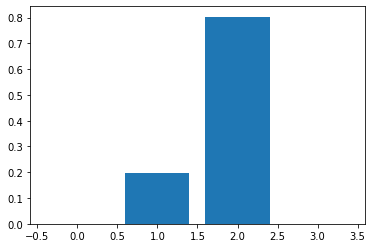

In [51]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()